In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mplhep as hep
import numpy as np

In [2]:
cmsstyle = hep.style.CMS
del cmsstyle["mathtext.fontset"]
del cmsstyle["mathtext.cal"]
plt.style.use(cmsstyle)

from plotting import *
from data import *

In [3]:
def load_limit(file, observed=False):
    with open(file, 'r') as f:
        limits = [float(x[:-1].split(' ')[-1]) for x in f]
        if limits == []: return None, [None, None], [None, None]

        if(observed):
            obs = limits[0]
            median = limits[3]
            cl_95 = [limits[1], limits[5]]
            cl_68 = [limits[2], limits[4]]
        else:
            obs = None
            median = limits[2]
            cl_95 = [limits[0], limits[4]]
            cl_68 = [limits[1], limits[3]]
        return median, cl_68, cl_95, obs
    
def load_limits(directory, year, channel, spinpostfix = "", observed=False):
    obss = []
    medians = []
    cl_68_ups = []
    cl_68_downs = []
    cl_95_ups = []
    cl_95_downs = []

    for masspoint in masspoints:
        if observed: filename = directory + "/AsymptoticLimits_" + year + "_" + str(masspoint) + "_" + channel + spinpostfix + "_observed.txt"
        else: filename = directory + "/AsymptoticLimits_" + year + "_" + str(masspoint) + "_" + channel + spinpostfix + ".txt"
        
        median, cl_68, cl_95, obs = load_limit(filename, observed)

        obss.append(obs)
        medians.append(median)
        cl_68_downs.append(cl_68[0])
        cl_68_ups.append(cl_68[1])
        cl_95_downs.append(cl_95[0])
        cl_95_ups.append(cl_95[1])
        
    return np.asarray([medians, cl_68_ups, cl_68_downs, cl_95_ups, cl_95_downs, obss], dtype=float)

def scalelimit(limits, signalscalings):
    
    new_limits = []
    for limit in limits:
        new_limits.append( np.multiply(limit, signalscalings) )
    return new_limits

c_green = "#607641"
c_yellow = "#F5BB54"

c_red = "#e42536"
c_blue = "#5790fc"

In [4]:
masspoints = [700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2250, 2500, 2750, 3000]

In [5]:
# expected limits
spin = ""
outputdir = "outputs_mainPAS"
dosplit = False

limits = load_limits(outputdir, "", "total", spin, observed=True)

if dosplit:
    limits_mu = load_limits(outputdir, "", "mu", spin)
    limits_ele = load_limits(outputdir, "", "ele", spin)


In [6]:
# scaling (the same way as in the "create cards!!!")
signalscalings = [1./100.] * 18 # scaling all down by factor 100, but ONLY DO THIS FOR SR!!!

limits = scalelimit(limits, signalscalings)

if dosplit:
    limits_mu = scalelimit(limits_mu, signalscalings)
    limits_ele = scalelimit(limits_ele, signalscalings)

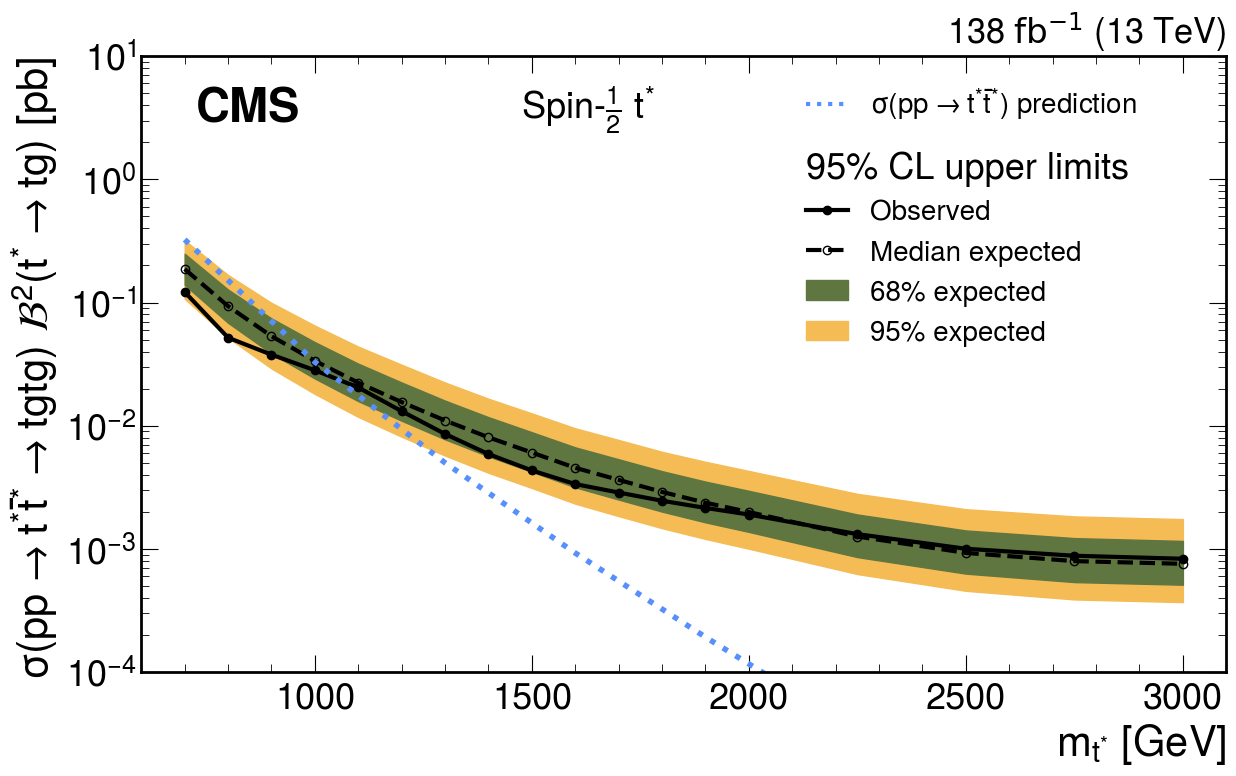

In [7]:
fig, ax = plot_skeleton(text="", data = True, year="run2", figsize = (14, 8), loc=2)

ax.plot(masspoints, limits[5], 'k-', label = 'Observed', marker='o', linewidth=3)
ax.plot(masspoints, limits[0], 'k--', label = 'Median expected', marker='o', mfc='none', linewidth=3)

if not dosplit:
    ax.fill_between([0],[0],[0], color = c_green, label = '68% expected') # fake needed for legend
    ax.fill_between(masspoints, limits[4], limits[3], color = c_yellow, label = '95% expected')
    ax.fill_between(masspoints, limits[2], limits[1], color = c_green) # no label here as fake is needed for proper order

if (spin == "_Spin32"):
    plot_other_line(get_theory_line(spin = 1.5, source="MadGraph noBR"), linestyle = ":", linewidth=4, label=None, color = c_blue, ax=ax)
    plot_other_line(get_last_cms("observed"), ax=ax, color=c_red, linewidth=3, label="CMS Phys.Lett.B 778\n(2018) 349 observed")
    plot_other_line(get_last_cms("expected"), ax=ax, color=c_red, linewidth=3, linestyle = "--", label="CMS Phys.Lett.B 778\n(2018) 349 expected")
else:
    plot_other_line(get_theory_line(spin = 0.5, source="MadGraph noBR"), linestyle = ":", linewidth=4, label=None, color = c_blue, ax=ax)
    ax.plot(np.NaN, np.NaN, '-', color='none', label=' \n ')
    ax.plot(np.NaN, np.NaN, '-', color='none', label=' \n ')
    
if dosplit:
    ax.plot(masspoints, limits_ele[0], 'g--', label = 'Expected ele')
    ax.plot(masspoints, limits_ele_observed[0], 'g-', label = 'Observed ele')
    ax.plot(masspoints, limits_mu[0], 'b--', label = 'Expected mu')
    ax.plot(masspoints, limits_mu_observed[0], 'b-', label = 'Observed mu')
    
ax.set_yscale("log")

# tick label size
ax.tick_params(axis='both', which='major', labelsize=26)

#ax.set_xlabel("t* mass [GeV]", fontsize=30)
ax.set_xlabel("$m_{t^{*}}$ [GeV]", fontsize=30)
ax.set_ylabel(r"$\sigma(pp \rightarrow t^{*}\bar{t}^{*} \rightarrow tgtg)~\mathcal{B}^2(t^{*} \rightarrow tg)~[pb]$", fontsize=30)


# main legend
if (spin == "_Spin32"): legloc1 = (0.6, 0.28)
else: legloc1 = (0.6, 0.28)
leg1 = plt.legend(title = "95% CL upper limits", prop={'size': 20}, loc=legloc1)
leg1._legend_box.align = "left"
ax.add_artist(leg1)

# fake second legend
if (spin == "_Spin32"): legloc2 = (0.6, 0.87)
else: legloc2 = (0.6, 0.87)
theorylabel = "$\\sigma (pp \\rightarrow t^{*}\\bar{t}^{*})$ prediction"
theoryline, = plt.plot(0, 0, linestyle = ":", linewidth = 3, color = c_blue, label = theorylabel)
leg2 = plt.legend(handles = [theoryline], prop={'size': 20}, loc=legloc2)
leg2._legend_box.align = "left"

if (spin == "_Spin32"):
    plt.ylim(2e-4, 100)
    plt.xlim(600, 3100)
else:
    plt.ylim(1e-4, 10)
    plt.xlim(600, 3100)

# add spin-text
if (spin == "_Spin32"): plt.text(0.35, 0.9, "Spin-$\\frac{3}{2}$ $t^{*}$", transform = ax.transAxes)
else: plt.text(0.35, 0.9, "Spin-$\\frac{1}{2}$ $t^{*}$", transform = ax.transAxes)

if (spin == "_Spin32"): outputname = "plots/limits_32"
else: outputname = "plots/limits_12"

if dosplit: outputname += "_csplit"

plt.savefig(outputname + ".pdf")
plt.show()

In [8]:
# print range of exclusion
def exclusion_range(this_limits, observed = False):

    min_limit = 99999
    min_limit_mass = 0
    max_limit = -99999
    max_limit_mass = 0

    if observed: index = 5
    else: index = 0
    for masspoint, limit in zip(masspoints, this_limits[index]):

        if limit > max_limit:
            max_limit = limit
            max_limit_mass = masspoint
        if limit < min_limit:
            min_limit = limit
            min_limit_mass = masspoint

    print(f"Found lowest limit at {min_limit_mass} GeV with {min_limit} pb.")
    print(f"Found highest limit at {max_limit_mass} GeV with {max_limit} pb.")
    
from scipy.interpolate import interp1d

def get_crossing(masspoints, limits, theory_line):
    
    x2 = np.asarray(list(theory_line.keys()))
    y2 = np.asarray(list(theory_line.values()))[:,0]
    
    # logging to make linear interpolation better
    limits = np.log10(limits)
    y2 = np.log10(y2)
    
    f1 = interp1d(masspoints, limits, kind='linear')
    f2 = interp1d(x2, y2, kind='linear')

    x_test = np.arange(700, 2500, 1)
    
    y_1 = f1(x_test)
    y_2 = f2(x_test)
    
    diff = y_1 - y_2
    
    signs = np.sign(diff)

    # Compute the difference between consecutive signs
    sign_diff = np.diff(signs)

    # Identify indices where the difference is non-zero
    sign_change_indices = np.where(sign_diff != 0)[0]

    print("Crossing is at {} GeV".format(x_test[sign_change_indices]))

In [9]:
print("Expected:")
exclusion_range(limits)
print("Observed:")
exclusion_range(limits, True)

Expected:
Found lowest limit at 3000 GeV with 0.0007570000000000001 pb.
Found highest limit at 700 GeV with 0.186875 pb.
Observed:
Found lowest limit at 3000 GeV with 0.000832 pb.
Found highest limit at 700 GeV with 0.121729 pb.


In [10]:
# pring crossing value
if (spin == "_Spin32"):
    print("Expected:")
    get_crossing(masspoints, limits[0], get_theory_line(spin = 1.5, source="MadGraph noBR"))
    
    print("Observed:")
    get_crossing(masspoints, limits[5], get_theory_line(spin = 1.5, source="MadGraph noBR"))
else:
    print("Expected:")
    get_crossing(masspoints, limits[0], get_theory_line(spin = 0.5, source="MadGraph noBR"))
    
    print("Observed:")
    get_crossing(masspoints, limits[5], get_theory_line(spin = 0.5, source="MadGraph noBR"))

Expected:
Crossing is at [993] GeV
Observed:
Crossing is at [1050] GeV
